In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys
import pandas as pd

# Get the absolute path to the src directory
src_path = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Add src_path to the system path
sys.path.insert(0, src_path)

from utils import mappings


INPUT_PATH = "../../data/processed/5_centralization_df.csv"
YEARS = [str(i) for i in range(2015, 2025)]

In [2]:
def plot_centralization_comparison(df, years, top5=True):
    """
    Create a plot showing either the top 5 or bottom 5 subfields by betweenness centralization.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with subfields as rows and years as columns.
    years : list
        List of years to plot.
    top5 : bool, optional
        If True, show the top 5 most centralized subfields; if False, show the bottom 5.
        Default is True.

    Returns:
    --------
    matplotlib.figure.Figure
        The figure object containing the plot.
    """
    # Set seaborn's research paper theme
    sns.set_theme(style="whitegrid", context="paper", font_scale=2.2)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(14, 8))

    # Select subfields based on top5 parameter
    if top5:
        selected_subfields = df.sort_values("Average", ascending=False).index[:5]
        title = "5 Most Centralized Subfields (2015 -- 2024)"
    else:
        selected_subfields = df.sort_values("Average", ascending=True).index[:5]
        title = "5 Least Centralized Subfields (2015 -- 2024)"

    # Plot selected subfields with short labels from mappings.SUBFIELDS_SHORT
    for subfield in selected_subfields:
        color = mappings.COLOUR_PALETTE.get(subfield, None)
        marker = mappings.MARKERS.get(subfield, "o")
        # Use the short name for the legend label, falling back to the original name if missing
        short_label = mappings.SUBFIELDS_SHORT.get(subfield, subfield)

        ax.plot(
            years,
            df.loc[subfield, years],
            marker=marker,
            linewidth=2,
            markersize=8,
            color=color,
            label=short_label,
        )

    # Configure plot
    ax.grid(True, linestyle="--", alpha=0.7)
    # ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Betweenness Centralization")
    ax.set_xticks(years)
    ax.set_xticklabels(years)

    # Set y-axis limits with some padding
    all_values = [
        df.loc[subfield, year] for subfield in selected_subfields for year in years
    ]
    y_min = 0
    y_max = min(1, max(all_values) + 0.01)
    ax.set_ylim(y_min, y_max)

    # Place the legend at the bottom center of the plot, with a horizontal layout.
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.2),
        ncol=3,
        title="Subfields",
        frameon=True,
    )

    # Set overall title
    fig.suptitle(f"Top 5 Most Centralized Subfields ({years[0]} -- {years[-1]})", y=0.95)


    # Adjust layout to accommodate the legend
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

    plt.savefig(
        fname="../../results/figures/betweenness_centralization.pdf",
        format="pdf",
        bbox_inches="tight",
    )

    return fig

In [3]:
centralization_df = pd.read_csv(INPUT_PATH, index_col=0)
centralization_df.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Average
Computer Vision and Pattern Recognition,0.003402,0.000543,0.000149,0.000747,0.005386,0.001508,0.001700,0.000842,0.000887,0.000132,0.001530
Information Systems,0.003853,0.001028,0.001712,0.001586,0.001669,0.001377,0.000472,0.000472,0.000532,0.000071,0.001277
Computational Theory and Mathematics,0.003719,0.001355,0.003646,0.001671,0.001085,0.001602,0.003253,0.001736,0.003232,0.006404,0.002770
Artificial Intelligence,0.000363,0.000353,0.002120,0.000232,0.002446,0.002785,0.001736,0.000300,0.000216,0.000174,0.001073
Computer Networks and Communications,0.009312,0.006888,0.031734,0.030884,0.040437,0.041140,0.014230,0.024350,0.025264,0.000569,0.022481


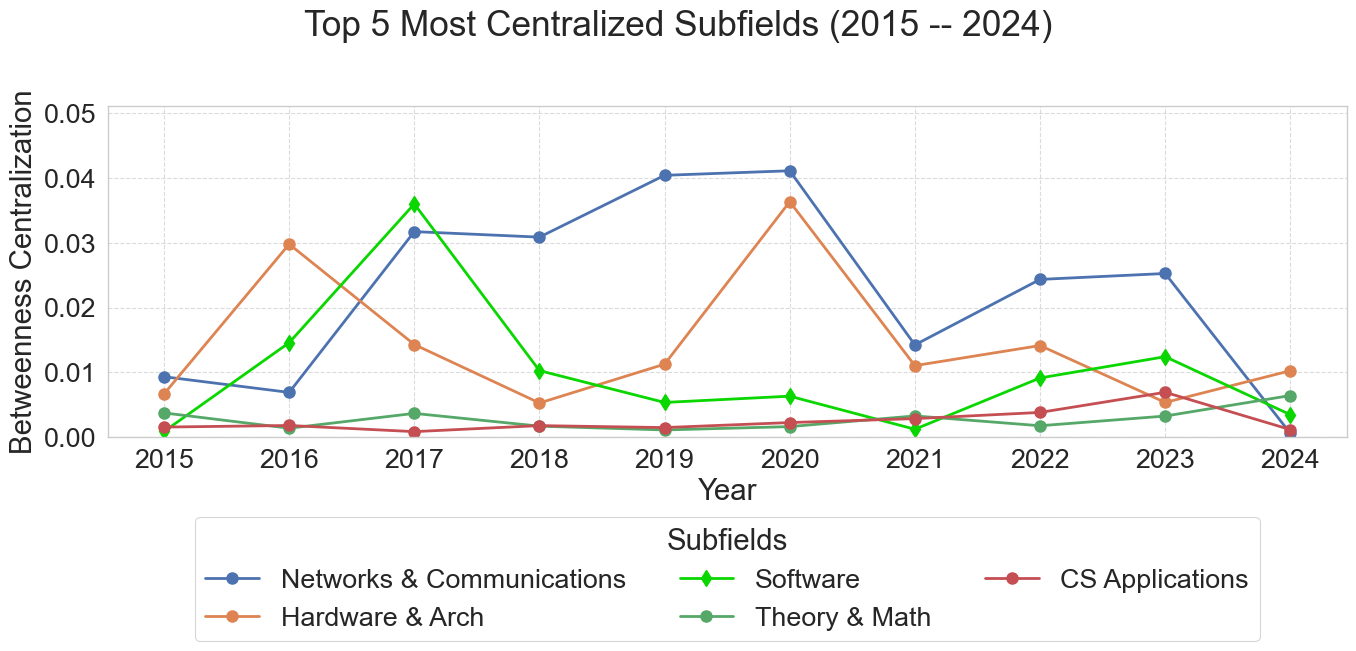

In [4]:
plot_centralization_comparison(centralization_df, YEARS)
plt.show()